<a href="https://colab.research.google.com/github/hasanakkaya0/Stat112-Final-Group-Project/blob/main/Stat112_Final_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# specifying the file path
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/airline_passenger_satisfaction.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing the packages
import pandas as pd
import numpy as np

In [3]:
# we converted the specified CSV file into a DataFrame named dirty_data and specified that the delimiter to be used is a (;) semicolon.
dirty_data = pd.read_csv(file_path, sep=';')

In [4]:
# first five observations
dirty_data.head()

,Gender,Customer Type,#Age,Type of Travel,Class,//Flight Distance\\\,#Departure Delay in Minutes,#arrival delay in minutes,Inflight Wifi Service,$$Food_and_Drink##,SEAT COMFORT,Inflight Entertainment,CLEANLINESS,SATISFACTION,Travel Insurance Purchased,Total Travel Time (Minutes),Price of Ticket ($)
0,Male,Disloyal Customer,43.0,Business Travel,Eco,1936.0,26.0,26.0,4.0,2.0,1.0,5.0,4.0,Satisfied,No,272.0,396$
1,Female,Loyal Customer,65.0,Business Travel,Eco,1016.0,4.0,8.0,1.0,4.0,1.0,3.0,4.0,Dissatisfied,No,121.0,465$
2,Male,Loyal Customer,21.0,Business Travel,Eco,1460.0,13.0,17.0,2.0,5.0,5.0,3.0,3.0,Dissatisfied,Yes,162.0,356$
3,Male,Disloyal Customer,39.0,Business Travel,Eco_Plus,1349.0,0.0,4.0,4.0,2.0,1.0,5.0,5.0,Satisfied,YES,163.0,567$
4,Male,Disloyal Customer,46.0,Business Travel,Business,997.0,2.0,7.0,1.0,5.0,4.0,2.0,5.0,Dissatisfied,YES,117.0,789$


In [5]:
# last five observations
dirty_data.tail()

,Gender,Customer Type,#Age,Type of Travel,Class,//Flight Distance\\\,#Departure Delay in Minutes,#arrival delay in minutes,Inflight Wifi Service,$$Food_and_Drink##,SEAT COMFORT,Inflight Entertainment,CLEANLINESS,SATISFACTION,Travel Insurance Purchased,Total Travel Time (Minutes),Price of Ticket ($)
995,MaLE,Disloyal Customer,39.0,Business Travel,Business,1734.0,36.0,42.0,4.0,2.0,2.0,1.0,4.0,Neutral,No,272.0,477$
996,Male,disloyal,44.0,Business Travel,Eco,1254.0,38.0,42.0,5.0,3.0,5.0,3.0,2.0,Satisfied,No,161.0,565$
997,Female,Loyal Customer,37.0,Personal Travel,Eco,2164.0,3.0,0.0,4.0,2.0,3.0,2.0,4.0,Satisfied,No,250.0,179$
998,Female,Loyal Customer,53.0,Personal Travel,Business,1013.0,0.0,5.0,1.0,3.0,2.0,3.0,1.0,Satisfied,Yes,115.0,588$
999,MaLE,disloyal,48.0,Business Travel,Eco,1703.0,12.0,23.0,5.0,1.0,3.0,5.0,2.0,Satisfied,No,151.0,277$


In [6]:
# examining the data
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1000 non-null   object 
 1   Customer Type                992 non-null    object 
 2   #Age                         998 non-null    float64
 3   Type of Travel               987 non-null    object 
 4   Class                        995 non-null    object 
 5   //Flight Distance\\\         993 non-null    float64
 6   #Departure Delay in Minutes  997 non-null    float64
 7   #arrival delay in minutes    994 non-null    float64
 8   Inflight Wifi Service        996 non-null    float64
 9   $$Food_and_Drink##           988 non-null    float64
 10  SEAT COMFORT                 991 non-null    float64
 11  Inflight Entertainment       990 non-null    float64
 12  CLEANLINESS                  995 non-null    float64
 13  SATISFACTION       

In [7]:
# we converted the column names to title format, ensuring that the first letter of each word is capitalized
dirty_data.columns = dirty_data.columns.str.title()
dirty_data.columns

Index(['Gender', 'Customer Type', '#Age', 'Type Of Travel', 'Class',
       '//Flight Distance\\\', '#Departure Delay In Minutes',
       '#Arrival Delay In Minutes', 'Inflight Wifi Service',
       '$$Food_And_Drink##', 'Seat Comfort', 'Inflight Entertainment',
       'Cleanliness', 'Satisfaction', 'Travel Insurance Purchased',
       'Total Travel Time (Minutes)', 'Price Of Ticket ($)'],
      dtype='object')

In [8]:
# we resolved inconsistencies in the column names and improved their readability by renaming them
dirty_data = dirty_data.rename({'#Age': 'Age' , '//Flight Distance\\\\\\' : 'Flight Distance' ,'#Departure Delay In Minutes' : 'Departure Delay in Minutes' , '#Arrival Delay In Minutes': 'Arrival Delay in Minutes', '$$Food_And_Drink##' : 'Food and Drink','#Price':'Price', "Type Of Travel": "Type of Travel", "Price Of Ticket ($)": "Price of Ticket ($)"},axis = "columns")
dirty_data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Inflight Wifi Service', 'Food and Drink',
       'Seat Comfort', 'Inflight Entertainment', 'Cleanliness', 'Satisfaction',
       'Travel Insurance Purchased', 'Total Travel Time (Minutes)',
       'Price of Ticket ($)'],
      dtype='object')

In [9]:
# 5 ordinal data columns, such as Inflight Wifi Service, were incorrectly categorized as float so we changed their type to object
columns_to_convert = ['Inflight Wifi Service', 'Food and Drink', 'Seat Comfort', 'Inflight Entertainment', 'Cleanliness']
dirty_data [columns_to_convert] = dirty_data[columns_to_convert].astype('object')

In [10]:
# we printed the changes to review the modifications we made
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1000 non-null   object 
 1   Customer Type                992 non-null    object 
 2   Age                          998 non-null    float64
 3   Type of Travel               987 non-null    object 
 4   Class                        995 non-null    object 
 5   Flight Distance              993 non-null    float64
 6   Departure Delay in Minutes   997 non-null    float64
 7   Arrival Delay in Minutes     994 non-null    float64
 8   Inflight Wifi Service        996 non-null    object 
 9   Food and Drink               988 non-null    object 
 10  Seat Comfort                 991 non-null    object 
 11  Inflight Entertainment       990 non-null    object 
 12  Cleanliness                  995 non-null    object 
 13  Satisfaction       

Note: We identified that the "Price Of Ticket" column has a data type of object and needs to be converted to float64. However, we addressed this issue by removing the dollar symbol from each observation in the "Price Of Ticket ($)" column during the correction process.

In [11]:
# we checked for any duplicate rows in the dataset
dirty_data[dirty_data.duplicated()]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight Wifi Service,Food and Drink,Seat Comfort,Inflight Entertainment,Cleanliness,Satisfaction,Travel Insurance Purchased,Total Travel Time (Minutes),Price of Ticket ($)


In [12]:
# no duplicate data was found, but to ensure accuracy, we performed a second check
dirty_data.duplicated().sum()

0

***From this point, we carefully inspected each observation in every column. We chose not to remove any columns. Some columns did not need any changing, however we checked them and leave those codes. This ensured that every column and its observations were thoroughly reviewed and accounted for.***


# ***For Gender***

In [13]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data['Gender'].value_counts())

Gender
Female    505
Male      484
MaLE        6
fEMALE      5
Name: count, dtype: int64


In [14]:
# we standardized the text format in the "Gender" column by capitalizing the first letter of each word
dirty_data['Gender']=dirty_data['Gender'].str.title()
print(dirty_data['Gender'].value_counts())

Gender
Female    510
Male      490
Name: count, dtype: int64


# ***For Customer Type***

In [15]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data['Customer Type'].value_counts())

Customer Type
Loyal Customer       583
Disloyal Customer    388
Disloyal_Customer      9
Loyal_Customer         6
disloyal Customer      3
disloyal               2
Loyal                  1
Name: count, dtype: int64


In [16]:
# we standardized the text format in the "Customer Type" column by capitalizing the first letter of each word
dirty_data['Customer Type'] = dirty_data['Customer Type'].str.title()
print(dirty_data['Customer Type'].value_counts())

Customer Type
Loyal Customer       583
Disloyal Customer    391
Disloyal_Customer      9
Loyal_Customer         6
Disloyal               2
Loyal                  1
Name: count, dtype: int64


In [17]:
# we cleaned unnecessary characters and white spaces in the "Customer Type" column and made it more consistent
dirty_data['Customer Type'] = dirty_data['Customer Type'].str.replace('_', ' ')
dirty_data['Customer Type'] = dirty_data['Customer Type'].str.strip()
dirty_data['Customer Type'] = dirty_data['Customer Type'].replace({'Loyal': 'Loyal Customer', 'Disloyal': 'Disloyal Customer'})
print(dirty_data['Customer Type'].value_counts())

Customer Type
Loyal Customer       590
Disloyal Customer    402
Name: count, dtype: int64


# ***For Age***

In [18]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data['Age'].value_counts())

Age
 43.0    51
 42.0    50
 45.0    41
 41.0    40
 38.0    38
 36.0    38
 39.0    37
 35.0    37
 40.0    35
 44.0    34
 34.0    34
 32.0    32
 37.0    32
 31.0    31
 30.0    30
 33.0    28
 50.0    28
 48.0    27
 47.0    26
 49.0    25
 28.0    23
 46.0    23
 51.0    22
 52.0    20
 26.0    20
 29.0    19
 18.0    19
 24.0    18
 25.0    14
 53.0    14
 56.0    12
 21.0    11
 19.0    10
 27.0     9
 20.0     9
 54.0     9
 23.0     7
 60.0     7
 58.0     7
 22.0     6
 61.0     4
 59.0     4
 55.0     4
 63.0     3
 57.0     2
 62.0     1
 64.0     1
 65.0     1
 72.0     1
 71.0     1
 68.0     1
-34.0     1
-48.0     1
Name: count, dtype: int64


In [19]:
# we identified negative values in the "Age" column. Since age cannot be negative and the absolute values of these entries correspond to plausible ages
dirty_data['Age'] = dirty_data['Age'].abs()
print(dirty_data['Age'].value_counts())

Age
43.0    51
42.0    50
45.0    41
41.0    40
38.0    38
36.0    38
39.0    37
35.0    37
34.0    35
40.0    35
44.0    34
32.0    32
37.0    32
31.0    31
30.0    30
48.0    28
33.0    28
50.0    28
47.0    26
49.0    25
46.0    23
28.0    23
51.0    22
52.0    20
26.0    20
29.0    19
18.0    19
24.0    18
25.0    14
53.0    14
56.0    12
21.0    11
19.0    10
54.0     9
20.0     9
27.0     9
58.0     7
60.0     7
23.0     7
22.0     6
55.0     4
61.0     4
59.0     4
63.0     3
57.0     2
72.0     1
64.0     1
62.0     1
65.0     1
71.0     1
68.0     1
Name: count, dtype: int64


# ***For Type of Travel***

In [20]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data['Type of Travel'].value_counts())

Type of Travel
Business Travel    702
Personal Travel    281
PERSONAL TRAVEL      2
business Travel      1
personal travel      1
Name: count, dtype: int64


In [21]:
# we standardized the text format in the "Customer Type" column by capitalizing the first letter of each word
dirty_data['Type of Travel'] = dirty_data['Type of Travel'].str.title()
print(dirty_data['Type of Travel'].value_counts())

Type of Travel
Business Travel    703
Personal Travel    284
Name: count, dtype: int64


# ***For Class***

In [22]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data['Class'].value_counts())

Class
Eco         505
Business    396
Eco Plus     90
business      2
Eco_Plus      1
Eco-Plus      1
Name: count, dtype: int64


In [23]:
# we standardized the text format in the "Class" column by capitalizing the first letter of each word
dirty_data['Class'] = dirty_data['Class'].str.title()
print(dirty_data['Class'].value_counts())

Class
Eco         505
Business    398
Eco Plus     90
Eco_Plus      1
Eco-Plus      1
Name: count, dtype: int64


In [24]:
# we cleaned unnecessary characters and white spaces in the "Class" column and made it more consistent
dirty_data['Class'] = dirty_data['Class'].str.replace('_', ' ')
dirty_data['Class'] = dirty_data['Class'].str.replace('-', ' ')
dirty_data['Class'] = dirty_data['Class'].str.strip()
print(dirty_data['Class'].value_counts())

Class
Eco         505
Business    398
Eco Plus     92
Name: count, dtype: int64


# ***For Flight Distance***

In [25]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data["Flight Distance"].value_counts())

Flight Distance
300.0     6
1574.0    4
1429.0    4
1371.0    4
1230.0    4
         ..
1304.0    1
991.0     1
986.0     1
1964.0    1
1703.0    1
Name: count, Length: 762, dtype: int64


# ***For Deparature Delay in Minutes***

In [26]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data["Departure Delay in Minutes"].value_counts())

Departure Delay in Minutes
0.0     102
1.0      86
2.0      85
5.0      68
3.0      68
6.0      60
4.0      56
7.0      55
9.0      39
11.0     37
8.0      37
10.0     36
12.0     29
13.0     23
14.0     17
18.0     15
17.0     15
22.0     15
16.0     14
15.0     14
23.0     13
21.0     13
19.0     12
29.0     11
20.0     10
28.0      9
25.0      8
24.0      7
27.0      7
26.0      6
35.0      3
32.0      2
33.0      2
38.0      2
36.0      2
45.0      2
41.0      2
42.0      2
46.0      1
48.0      1
30.0      1
57.0      1
59.0      1
37.0      1
54.0      1
68.0      1
31.0      1
43.0      1
34.0      1
47.0      1
40.0      1
Name: count, dtype: int64


# ***For Arrival Delay in Minutes***

In [27]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data["Arrival Delay in Minutes"].value_counts())

Arrival Delay in Minutes
0.0     75
12.0    55
10.0    53
6.0     50
9.0     49
7.0     48
11.0    48
14.0    41
3.0     38
4.0     38
5.0     36
13.0    36
15.0    33
16.0    31
8.0     30
17.0    29
18.0    26
19.0    24
23.0    23
2.0     23
1.0     19
22.0    16
21.0    15
25.0    14
26.0    13
20.0    12
34.0    12
27.0    11
24.0    10
29.0    10
33.0     8
31.0     7
28.0     7
30.0     6
35.0     5
42.0     5
38.0     4
32.0     4
39.0     4
36.0     3
41.0     3
40.0     3
37.0     3
43.0     2
49.0     2
52.0     1
54.0     1
69.0     1
62.0     1
48.0     1
68.0     1
60.0     1
45.0     1
65.0     1
53.0     1
Name: count, dtype: int64


# ***For Inflilight Wifi Service***

In [28]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data["Inflight Wifi Service"].value_counts())

Inflight Wifi Service
3.0    294
2.0    213
4.0    201
1.0    101
0.0     98
5.0     89
Name: count, dtype: int64


# ***For Food and Drink***

In [29]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data["Food and Drink"].value_counts())

Food and Drink
3.0    306
4.0    262
2.0    191
1.0    130
5.0     99
Name: count, dtype: int64


# ***For Seat Comfort***

In [30]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data["Seat Comfort"].value_counts())

Seat Comfort
3.0    282
1.0    208
4.0    196
2.0    195
5.0    110
Name: count, dtype: int64


# ***For Inflight Entertainment***

In [31]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data["Inflight Entertainment"].value_counts())

Inflight Entertainment
3.0    284
4.0    242
5.0    197
2.0    169
1.0     98
Name: count, dtype: int64


# ***For Cleanliness***

In [32]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data["Cleanliness"].value_counts())

Cleanliness
4.0    294
3.0    287
2.0    213
1.0    107
5.0     94
Name: count, dtype: int64


# ***For Satisfaction***

In [33]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data["Satisfaction"].value_counts())

Satisfaction
Satisfied        503
Dissatisfied     257
Neutral          204
S                  9
NEUTRSL            6
SATISFY            5
D                  3
 Satisfied         2
 Dissatisfied      1
N                  1
D                  1
Name: count, dtype: int64


In [34]:
# we standardized the text format in the "Satisfaction" column by capitalizing the first letter of each word and removed unnecessary spaces at the beginning and end of the words
dirty_data['Satisfaction'] = dirty_data['Satisfaction'].str.title()
dirty_data['Satisfaction'] = dirty_data['Satisfaction'].str.strip()
print(dirty_data['Satisfaction'].value_counts())

Satisfaction
Satisfied       505
Dissatisfied    258
Neutral         204
S                 9
Neutrsl           6
Satisfy           5
D                 4
N                 1
Name: count, dtype: int64


In [35]:
# we corrected the different types of expressions in the "Satisfaction" column and established a standard
dirty_data['Satisfaction'] = dirty_data['Satisfaction'].replace({'S': 'Satisfied', 'Neutrsl': 'Neutral', 'N': 'Neutral', 'Not S': 'Not Satisfied', 'D': 'Dissatisfied', 'Satisfy': 'Satisfied'})
print(dirty_data['Satisfaction'].value_counts())

Satisfaction
Satisfied       519
Dissatisfied    262
Neutral         211
Name: count, dtype: int64


# ***For Travel Insurance Purchased***

In [36]:
# we checked to see if there are any entry inconsistencies in the observations
print(dirty_data['Travel Insurance Purchased'].value_counts())

Travel Insurance Purchased
No     690
Yes    278
NO      10
N        9
YES      5
Nno      5
Name: count, dtype: int64


In [37]:
# we standardized the text format in the "Travel Insurance Purchased" column by capitalizing the first letter of each word and removed unnecessary spaces at the beginning and end of the words
dirty_data['Travel Insurance Purchased'] = dirty_data['Travel Insurance Purchased'].str.title()
dirty_data['Travel Insurance Purchased'] = dirty_data['Travel Insurance Purchased'].str.strip()
print(dirty_data['Travel Insurance Purchased'].value_counts())

Travel Insurance Purchased
No     700
Yes    283
N        9
Nno      5
Name: count, dtype: int64


In [38]:
# we corrected the differently typed expressions in the "Travel Insurance Purchased" column and established a standard
dirty_data['Travel Insurance Purchased'] = dirty_data['Travel Insurance Purchased'].replace({'N': 'No', 'Nno': 'No'})
print(dirty_data['Travel Insurance Purchased'].value_counts())

Travel Insurance Purchased
No     714
Yes    283
Name: count, dtype: int64


# ***For Travel Time (Minutes)***

In [39]:
# we sorted and printed the values in the "Total Travel Time (Minutes)" column to identify any potential inconsistencies or errors
sorted_ttt_data = dirty_data['Total Travel Time (Minutes)'].sort_values()
print(sorted_ttt_data)

987   -269.0
13    -139.0
298     29.0
932     31.0
955     31.0
       ...  
69       NaN
84       NaN
115      NaN
194      NaN
212      NaN
Name: Total Travel Time (Minutes), Length: 1000, dtype: float64


In [40]:
# we identified negative values in the 'Total Travel Time (Minutes)' column. Since total travel time cannot be negative and the absolute values of these entries correspond to plausible time values, we assumed these to be typo errors and converted them to their absolute values
dirty_data['Total Travel Time (Minutes)'] = dirty_data['Total Travel Time (Minutes)'].abs()
sorted_ttt_data = dirty_data['Total Travel Time (Minutes)'].sort_values()
print(sorted_ttt_data)

298    29.0
932    31.0
955    31.0
65     32.0
83     33.0
       ... 
69      NaN
84      NaN
115     NaN
194     NaN
212     NaN
Name: Total Travel Time (Minutes), Length: 1000, dtype: float64


*Note: NaN values will be addressed and corrected at a later stage.*

# ***For Price Of Ticket ($)***

In [41]:
# we sorted and printed the values in the 'Price Of Ticket ($)' column to identify any potential inconsistencies or errors
sorted_pot_data = dirty_data.sort_values(by=['Price of Ticket ($)'], ascending=False)
print(sorted_pot_data['Price of Ticket ($)'])

884    878$
382    868$
144    859$
851     84$
886    823$
       ... 
705    101$
869    100$
478    -28$
374     -2$
149     NaN
Name: Price of Ticket ($), Length: 1000, dtype: object


In [42]:
# we removed the dollar symbol from the "Price of Ticket ($)" column, converted it to a numerical format, and sorted the data in descending order to display ticket prices from highest to lowest
if dirty_data['Price of Ticket ($)'].dtype == object:
    dirty_data['Price of Ticket ($)'] = dirty_data['Price of Ticket ($)'].str.replace('$', '', regex=False).astype(float)
sorted_pot_data = dirty_data.sort_values(by=['Price of Ticket ($)'], ascending=False)
print(sorted_pot_data['Price of Ticket ($)'])

884    878.0
382    868.0
144    859.0
886    823.0
184    812.0
       ...  
174     63.0
653     58.0
374     -2.0
478    -28.0
149      NaN
Name: Price of Ticket ($), Length: 1000, dtype: float64


In [43]:
# we identified negative values in the 'Price of Ticket ($)' column. Since price of ticket cannot be negative and the absolute values of these entries correspond to plausible prices, we assumed these to be typo errors and converted them to their absolute values
dirty_data['Price of Ticket ($)'] = dirty_data['Price of Ticket ($)'].abs()
sorted_pot_data = dirty_data.sort_values(by=['Price of Ticket ($)'], ascending=False)
print(sorted_pot_data['Price of Ticket ($)'])

884    878.0
382    868.0
144    859.0
886    823.0
184    812.0
       ...  
174     63.0
653     58.0
478     28.0
374      2.0
149      NaN
Name: Price of Ticket ($), Length: 1000, dtype: float64


*Note: NaN values will be addressed and corrected at a later stage.*

***The initial review of all columns,  the correction of typo errors and some other preliminary cleaning steps, has been completed.***


# ***The identification and cleaning of outliers.***


In [44]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1000 non-null   object 
 1   Customer Type                992 non-null    object 
 2   Age                          998 non-null    float64
 3   Type of Travel               987 non-null    object 
 4   Class                        995 non-null    object 
 5   Flight Distance              993 non-null    float64
 6   Departure Delay in Minutes   997 non-null    float64
 7   Arrival Delay in Minutes     994 non-null    float64
 8   Inflight Wifi Service        996 non-null    object 
 9   Food and Drink               988 non-null    object 
 10  Seat Comfort                 991 non-null    object 
 11  Inflight Entertainment       990 non-null    object 
 12  Cleanliness                  995 non-null    object 
 13  Satisfaction       

In [45]:
# displaying descriptive statistics for numerical columns
numerical_stats = dirty_data.describe()
numerical_stats.transpose()


,count,mean,std,min,25%,50%,75%,max
Age,998.0,39.003006,9.745456,18.0,32.0,39.0,45.0,72.0
Flight Distance,993.0,1492.548842,489.265232,300.0,1170.0,1489.0,1827.0,3056.0
Departure Delay in Minutes,997.0,8.900702,9.302328,0.0,2.0,6.0,12.0,68.0
Arrival Delay in Minutes,994.0,13.335010,10.597813,0.0,6.0,11.0,18.0,69.0
Total Travel Time (Minutes),995.0,192.562814,76.355206,29.0,142.0,183.0,233.5,488.0
Price of Ticket ($),999.0,419.558559,147.244056,2.0,309.0,415.0,521.5,878.0


In [46]:
# defining a function to calculate outliers
def find_outliers_iqr(column):

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return (column < (Q1 - 3 * IQR)) | (column > (Q3 + 3 * IQR))



*Note: We used 3 IQR instead of 1.5 IQR when identifying outliers because the values initially considered as outliers in our dataset were meaningful for our analysis. Additionally, we wanted to retain their influence in our visualizations without overly reducing their impact. This approach ensured that only extreme outliers were modified.*

In [47]:
# identifying columns that are applicable for the outlier function
outlier_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Travel Time (Minutes)', 'Price of Ticket ($)']

for col in outlier_columns:
    outliers = find_outliers_iqr(dirty_data[col])
    if not outliers.any():
        print(f"Outliers not detected in {col} \n")
    else:
        print(f"Outliers detected in {col}:")
        print(dirty_data[col][outliers], "\n")

Outliers not detected in Age 

Outliers not detected in Flight Distance 

Outliers detected in Departure Delay in Minutes:
132    47.0
271    45.0
338    43.0
411    68.0
467    54.0
499    45.0
551    46.0
554    59.0
656    57.0
861    48.0
Name: Departure Delay in Minutes, dtype: float64 

Outliers detected in Arrival Delay in Minutes:
411    69.0
467    62.0
551    68.0
554    60.0
656    65.0
Name: Arrival Delay in Minutes, dtype: float64 

Outliers not detected in Total Travel Time (Minutes) 

Outliers not detected in Price of Ticket ($) 



In [48]:
# replacing the outliers with the mean

for col in outlier_columns:
    # detecting outliers
    outliers = find_outliers_iqr(dirty_data[col])

    # calculating the mean excluding outliers and rounding them
    mean_value = round(dirty_data[col].mean())
    print(f"The rounded mean value for {col} is: {mean_value}")

    # replacing outliers with the mean
    dirty_data.loc[outliers, col] = mean_value

The rounded mean value for Age is: 39
The rounded mean value for Flight Distance is: 1493
The rounded mean value for Departure Delay in Minutes is: 9
The rounded mean value for Arrival Delay in Minutes is: 13
The rounded mean value for Total Travel Time (Minutes) is: 193
The rounded mean value for Price of Ticket ($) is: 420


In [49]:
# rechecking for outliers to ensure they are replaced
for col in outlier_columns:
    remaining_outliers = find_outliers_iqr(dirty_data[col])
    print(f"Remaining outliers in {col}: {dirty_data[col][remaining_outliers].count()}")

Remaining outliers in Age: 0
Remaining outliers in Flight Distance: 0
Remaining outliers in Departure Delay in Minutes: 0
Remaining outliers in Arrival Delay in Minutes: 0
Remaining outliers in Total Travel Time (Minutes): 0
Remaining outliers in Price of Ticket ($): 0


# ***The identification and cleaning of NaN values***

In [50]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1000 non-null   object 
 1   Customer Type                992 non-null    object 
 2   Age                          998 non-null    float64
 3   Type of Travel               987 non-null    object 
 4   Class                        995 non-null    object 
 5   Flight Distance              993 non-null    float64
 6   Departure Delay in Minutes   997 non-null    float64
 7   Arrival Delay in Minutes     994 non-null    float64
 8   Inflight Wifi Service        996 non-null    object 
 9   Food and Drink               988 non-null    object 
 10  Seat Comfort                 991 non-null    object 
 11  Inflight Entertainment       990 non-null    object 
 12  Cleanliness                  995 non-null    object 
 13  Satisfaction       

In [51]:
# displaying descriptive statistics for numerical columns
numerical_stats = dirty_data.describe()
numerical_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
Age,998.0,39.003006,9.745456,18.0,32.0,39.0,45.0,72.0
Flight Distance,993.0,1492.548842,489.265232,300.0,1170.0,1489.0,1827.0,3056.0
Departure Delay in Minutes,997.0,8.477432,8.234316,0.0,2.0,6.0,12.0,42.0
Arrival Delay in Minutes,994.0,13.074447,9.942356,0.0,6.0,11.0,18.0,54.0
Total Travel Time (Minutes),995.0,192.562814,76.355206,29.0,142.0,183.0,233.5,488.0
Price of Ticket ($),999.0,419.558559,147.244056,2.0,309.0,415.0,521.5,878.0


In [52]:
# replacing "NA" with NaN
dirty_data.replace("NA", pd.NA, inplace=True)

In [53]:
# we identified which columns contain missing values and how many missing values are present in each column
missing_values = dirty_data.isnull().sum()
print(f"Missing Values:\n{missing_values}")

Missing Values:
Gender                          0
Customer Type                   8
Age                             2
Type of Travel                 13
Class                           5
Flight Distance                 7
Departure Delay in Minutes      3
Arrival Delay in Minutes        6
Inflight Wifi Service           4
Food and Drink                 12
Seat Comfort                    9
Inflight Entertainment         10
Cleanliness                     5
Satisfaction                    8
Travel Insurance Purchased      3
Total Travel Time (Minutes)     5
Price of Ticket ($)             1
dtype: int64


In [54]:
# after identifying the columns with missing values, we defined them for further processing
missing_columns=['Customer Type','Age','Type of Travel','Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','Inflight Wifi Service','Food and Drink','Seat Comfort','Inflight Entertainment','Cleanliness','Satisfaction', 'Total Travel Time (Minutes)','Travel Insurance Purchased', 'Price of Ticket ($)']
# we wrote this line to prevent Pandas from automatically converting columns like "Food and Drink," whose observations are numeric but should have a data type of object, into float by interpreting the numbers as numeric values on its own
pd.set_option('future.no_silent_downcasting', True)

for col in missing_columns:
    # for numerical columns
    if dirty_data[col].dtype in ['float64', 'int64']:
        mean_value = round(dirty_data[col].mean())
        dirty_data[col] = dirty_data[col].fillna(mean_value)

    # for categorical columns
    else:
        mode_value = dirty_data[col].mode().iloc[0]
        # ensure type remains object
        dirty_data[col] = dirty_data[col].fillna(mode_value).astype('object')

final_missing_values = dirty_data.isnull().sum()
print(f"Missing Values After Fixing:\n{final_missing_values}")


Missing Values After Fixing:
Gender                         0
Customer Type                  0
Age                            0
Type of Travel                 0
Class                          0
Flight Distance                0
Departure Delay in Minutes     0
Arrival Delay in Minutes       0
Inflight Wifi Service          0
Food and Drink                 0
Seat Comfort                   0
Inflight Entertainment         0
Cleanliness                    0
Satisfaction                   0
Travel Insurance Purchased     0
Total Travel Time (Minutes)    0
Price of Ticket ($)            0
dtype: int64


In [55]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1000 non-null   object 
 1   Customer Type                1000 non-null   object 
 2   Age                          1000 non-null   float64
 3   Type of Travel               1000 non-null   object 
 4   Class                        1000 non-null   object 
 5   Flight Distance              1000 non-null   float64
 6   Departure Delay in Minutes   1000 non-null   float64
 7   Arrival Delay in Minutes     1000 non-null   float64
 8   Inflight Wifi Service        1000 non-null   object 
 9   Food and Drink               1000 non-null   object 
 10  Seat Comfort                 1000 non-null   object 
 11  Inflight Entertainment       1000 non-null   object 
 12  Cleanliness                  1000 non-null   object 
 13  Satisfaction       

In [56]:
numerical_stats = dirty_data.describe()
numerical_stats.transpose()


,count,mean,std,min,25%,50%,75%,max
Age,1000.0,39.003,9.735696,18.0,32.0,39.0,45.00,72.0
Flight Distance,1000.0,1492.552,487.548078,300.0,1171.0,1491.0,1827.00,3056.0
Departure Delay in Minutes,1000.0,8.476,8.221984,0.0,2.0,6.0,12.00,42.0
Arrival Delay in Minutes,1000.0,13.074,9.912456,0.0,6.0,11.0,18.00,54.0
Total Travel Time (Minutes),1000.0,192.565,76.163894,29.0,142.0,183.5,233.00,488.0
Price of Ticket ($),1000.0,419.559,147.170342,2.0,309.5,415.0,521.25,878.0


In [57]:
# we exported the clean dataset for individual visualizations
dirty_data.to_csv("cleandata.csv", index=False, sep=";")

**At the end of all these steps, our data cleaning process was completed, and we moved on to graphical visualizations.**

# *Visualization by Hasan Akkaya*

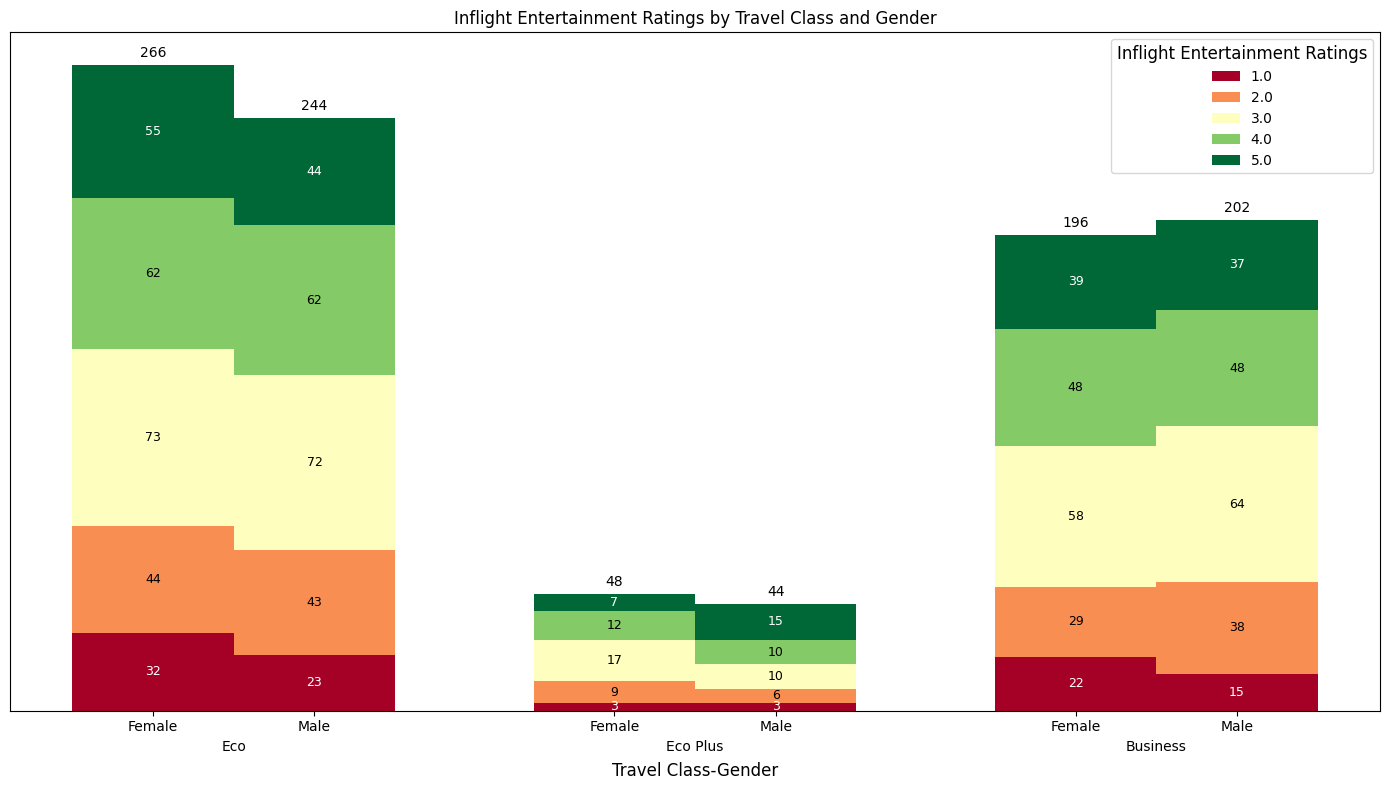

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# set the order of travel classes
custom_class_order = ["Eco", "Eco Plus", "Business"]
dirty_data['Class'] = pd.Categorical(dirty_data['Class'], categories=custom_class_order, ordered=True)
dirty_data = dirty_data.sort_values(by=['Class', 'Gender'])

# recreate the pivot table with observed=True to block warnings
pivot_data = dirty_data.groupby(['Class', 'Gender', 'Inflight Entertainment'], observed=True).size().reset_index(name='Count')
pivot_data = pivot_data.pivot_table(index=['Class', 'Gender'], columns='Inflight Entertainment', values='Count', aggfunc='sum', fill_value=0, observed=True)

# create a new figure
fig, ax = plt.subplots(figsize=(14, 8))

# parameters
width = 0.35  # width of each gender group
x = np.arange(len(custom_class_order))  # x-axis positions for each class

# get the unique genders and choose our group color palette
genders = pivot_data.index.levels[1]
color_palette = plt.cm.RdYlGn(np.linspace(0, 1, len(pivot_data.columns)))

# draw bars
for i, gender in enumerate(genders):
    for j, data_class in enumerate(custom_class_order):
        if (data_class, gender) in pivot_data.index:
            bar_data = pivot_data.loc[(data_class, gender), :]
            bottom = 0  # starting position for stacked bars

            # for each count label
            for k, value in enumerate(bar_data):
                if value > 0:
                    ax.bar(x[j] + i * width, value, width, bottom=bottom, color=color_palette[k])
                    y_pos = bottom + value / 2
                    text_color = 'white' if color_palette[k][0] + color_palette[k][1] + color_palette[k][2] < 1.5 else 'black' #automatic color for labels
                    ax.text(x[j] + i * width, y_pos, f"{int(value)}", ha='center', va='center', fontsize=9, color=text_color)
                    bottom += value

            ax.text(x[j] + i * width, bottom + 2, f"{int(bottom)}", ha='center', va='bottom', fontsize=10, color='black')

# add labels and adjust formatting
ax.set_title("Inflight Entertainment Ratings by Travel Class and Gender", fontsize=12)

# remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])

# create and position x-tick labels
new_xticks = []
new_xticks_positions = []

for j, data_class in enumerate(custom_class_order):
    for i, gender in enumerate(genders):
        new_xticks.append(f"{gender}")
        new_xticks_positions.append(x[j] + i * width)
    # add class labels at the middle of their respective groups
    ax.text(x[j] + width / 2, -15, f"{data_class}", ha='center', va='center', fontsize=10, color='black', transform=ax.transData)

ax.set_xticks(new_xticks_positions)
ax.set_xticklabels(new_xticks, rotation=0, fontsize=10)

# move the "Travel Class-Gender" label more down
ax.set_xlabel("Travel Class-Gender", fontsize=12, labelpad=20)

# customize legend
ax.legend([f"{i+1.0}" for i in range(len(pivot_data.columns))], title="Inflight Entertainment Ratings", fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()


# *Visualization by Aslı Ceren Aksu*

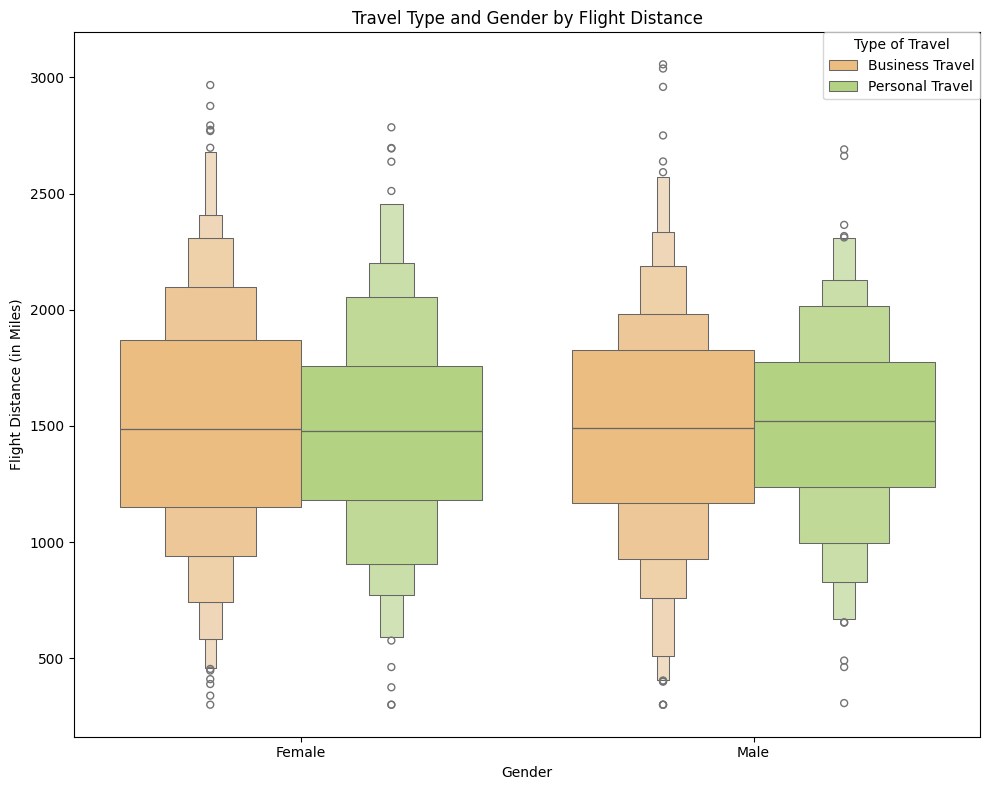

In [59]:
import seaborn as sns

plt.figure(figsize=(10, 8)) #arranging the figure size
sns.boxenplot( #creating a boxen plot
    data=dirty_data, #specifying which data that i am using
    x='Gender',# Gender on th x-axis
    y='Flight Distance', # Flight Distance on the y-axis
    hue='Type of Travel',# type of travel will be represented as 2 different colors
    palette='RdYlGn' # using our group RdYlGn palette for color palette
) #i created my boxen plot
plt.title('Travel Type and Gender by Flight Distance') #adding a title to my plot
plt.xlabel('Gender') #adding a label to the x-axis
plt.ylabel('Flight Distance (in Miles)')#adding a label to the y-axis
plt.legend(title= 'Type of Travel', bbox_to_anchor=(1.00, 1), loc='upper right', borderaxespad=0)#creating a legend,giving it a name
#and locate my legend on the upper right in a way that it does not obstacle us to see the graph
plt.tight_layout() #arranging the right spacing betweeen elements in order to avoid overlapping
plt.show() #to see graph

# *Visualization by Uğur İlbey Bebek*

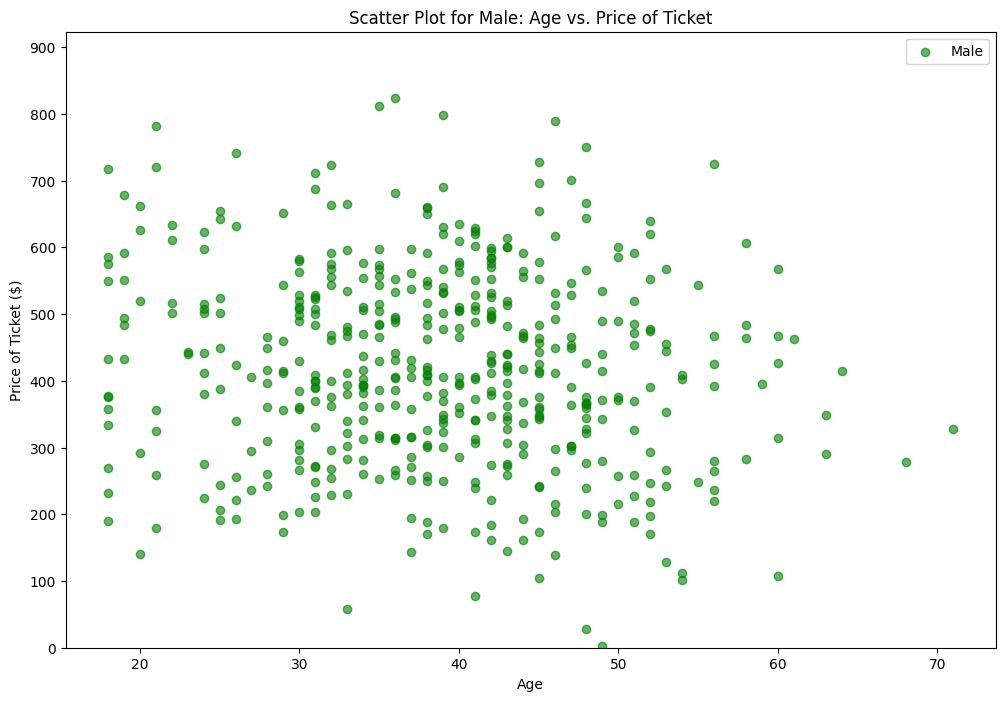

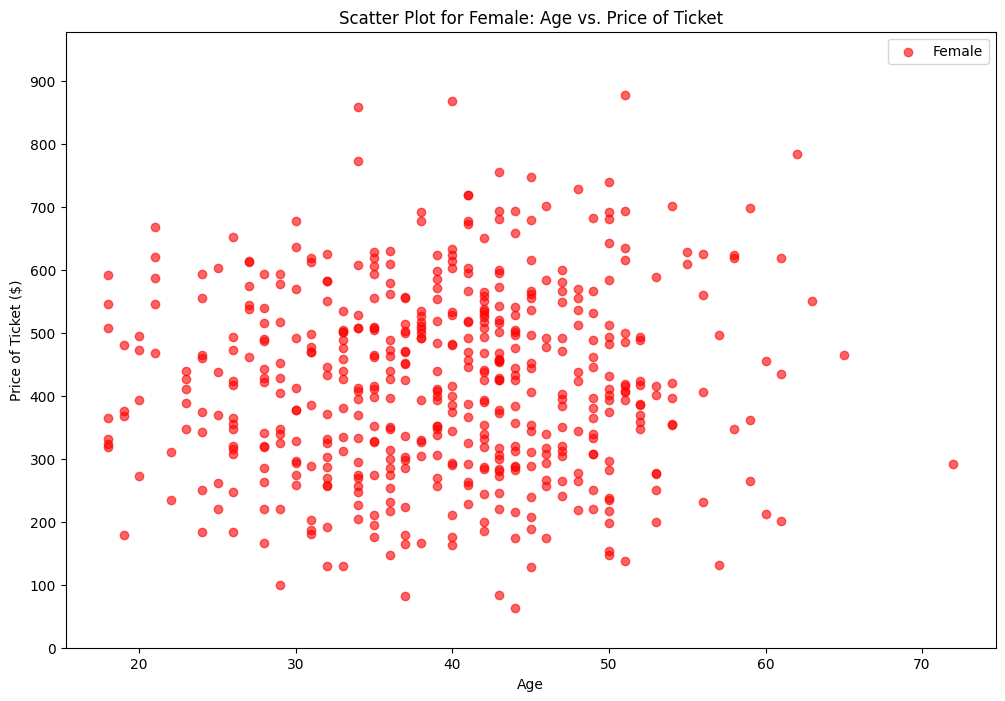

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = dirty_data

male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Scatter Plot for Males
plt.figure(figsize=(12, 8))
plt.scatter(
    male_data['Age'],
    male_data['Price of Ticket ($)'],
    alpha=0.6,
    color='green',
    label='Male'
)
plt.title("Scatter Plot for Male: Age vs. Price of Ticket")
plt.xlabel("Age")
plt.ylabel("Price of Ticket ($)")

# Adjusting Y-axis intervals at 100 units and make it begin from 0
plt.ylim(0, male_data['Price of Ticket ($)'].max() + 100)
plt.yticks(np.arange(0, male_data['Price of Ticket ($)'].max() + 100, 100))
plt.legend()
plt.show()

# Scatter Plot for  Females
plt.figure(figsize=(12, 8))
plt.scatter(
    female_data['Age'],
    female_data['Price of Ticket ($)'],
    alpha=0.6,
    color='red',
    label='Female'
)
plt.title("Scatter Plot for Female: Age vs. Price of Ticket")
plt.xlabel("Age")
plt.ylabel("Price of Ticket ($)")

# Adjusting Y-axis intervals at 100 units and make it begin from 0
plt.ylim(0, female_data['Price of Ticket ($)'].max() + 100)
plt.yticks(np.arange(0, female_data['Price of Ticket ($)'].max() + 100, 100))
plt.legend()
plt.show()

# *Visualization by Deniz Duru Eratak*

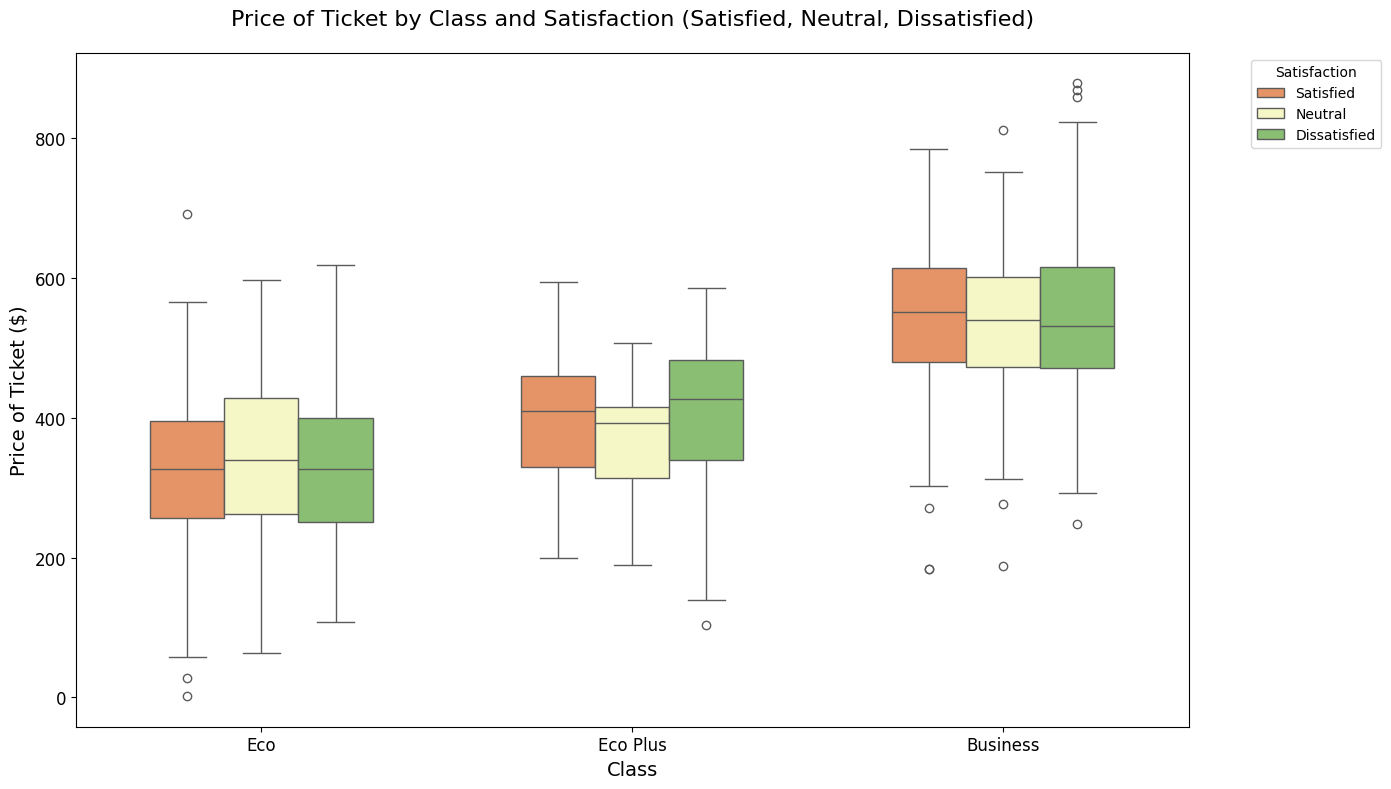

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# setting the order of the hue levels for the Satisfaction values
satisfaction_order = ['Satisfied', 'Neutral', 'Dissatisfied']

# setting the size
plt.figure(figsize=(14, 8))

# creating a box plot with the ue order
boxplot = sns.boxplot(
    data=data,
    x='Class',
    y='Price of Ticket ($)',
    hue='Satisfaction',
    hue_order=satisfaction_order,
    palette='RdYlGn', #setting the palette that our group chose
    width=0.6
)

# finding the median values on the box plot
for i, artist in enumerate(boxplot.artists):
    # getting the center of each box
    x_pos = artist.get_x() + artist.get_width() / 2
    # determining median values from the data
    satisfaction = satisfaction_order[i % 3]  # matching hue order
    travel_class = ['Eco', 'Eco Plus', 'Business'][i // 3]  # matching class order
    median_val = data[(data['Class'] == travel_class) & (data['Satisfaction'] == satisfaction)]['Price of Ticket ($)'].median()

# writing labels and a title
plt.title('Price of Ticket by Class and Satisfaction (Satisfied, Neutral, Dissatisfied)', fontsize=16, pad=20)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Price of Ticket ($)', fontsize=14)

# positioning legend and ordering
plt.legend(title="Satisfaction", bbox_to_anchor=(1.05, 1), loc='upper left')

# changing tick parameters for the graph to be read more easily
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# applying a tight layout in order to have a clearer graph
plt.tight_layout()

# showing the plot
plt.show()

# *Visualization by Ahmet Genç*

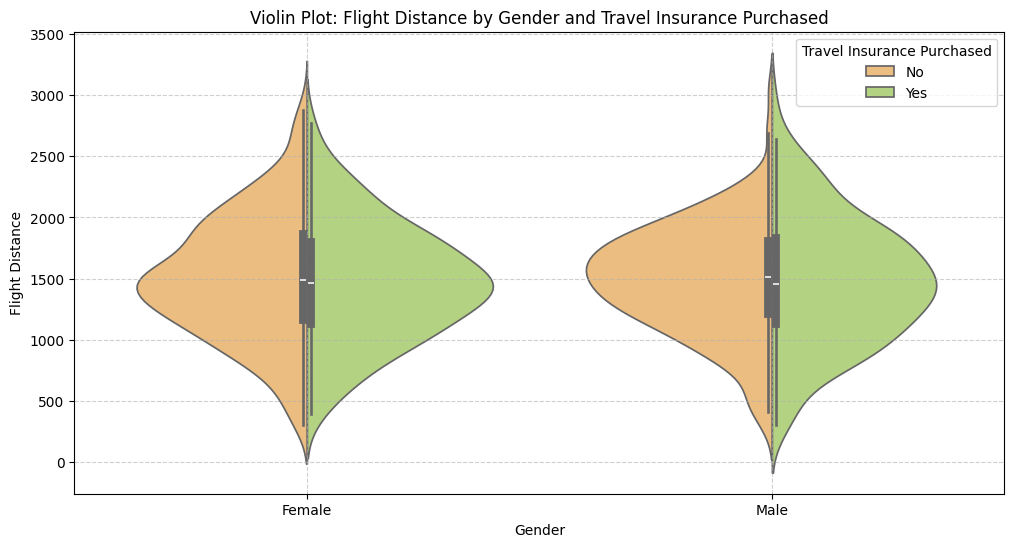

In [62]:
# creating a Violin Plot: Flight Distance by Gender and Travel Insurance Purchased
import seaborn as sns
import matplotlib.pyplot as plt

# setting up the plot size
plt.figure(figsize=(12, 6))

# creating the violin plot with Gender on the x-axis, Flight Distance on the y-axis, and Travel Insurance Purchased as hue
sns.violinplot(
    data=dirty_data,  # using the final data for the plot
    x='Gender',  # the gender column to categorize the data
    y='Flight Distance',  # the column for the y-axis (flight distance)
    hue='Travel Insurance Purchased',  # the hue to split the data by (whether travel insurance was purchased)
    split=True,  # spliting the violins to show differences between the two travel insurance categories
    palette='RdYlGn'  # choosing our group color palette
)

# setting the title, labels, and grid of the plot
plt.title('Violin Plot: Flight Distance by Gender and Travel Insurance Purchased')
plt.xlabel('Gender')  # labeling for the x-axis
plt.ylabel('Flight Distance')  # labeling for the y-axis
plt.grid(True, linestyle='--', alpha=0.6)  # grid lines for better readability
plt.gca().set_facecolor('white')  # setting the background color to white

# showing the plot
plt.show()

# *Visualization by Ayşegül Görgel*

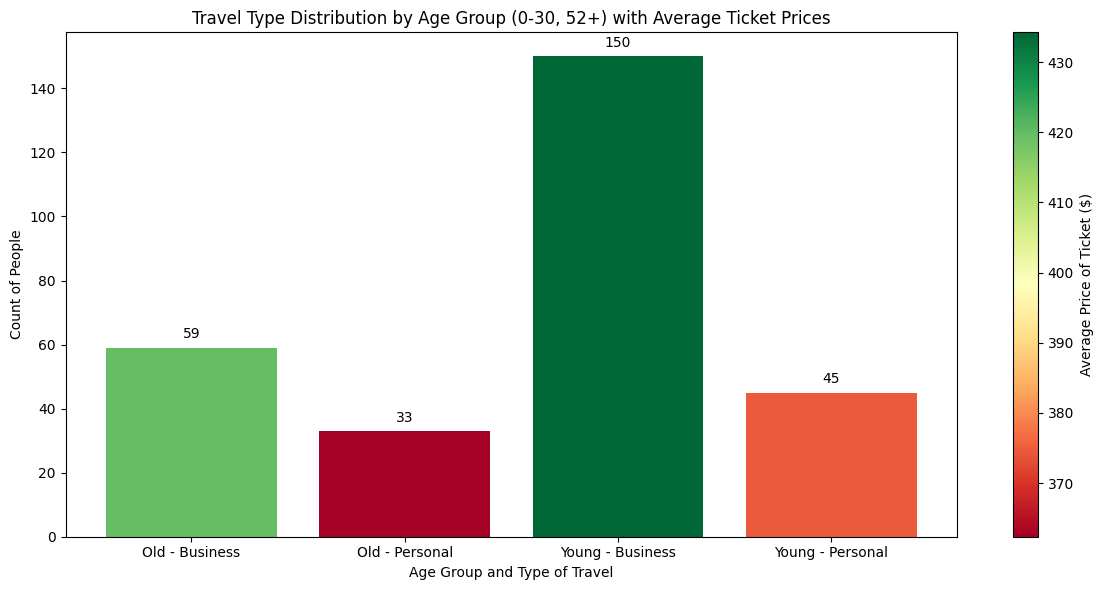

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

data = dirty_data

# updating the age group classification to include 52+ as 'Old' and <=30 as 'Young'
data['Age Group'] = data['Age'].apply(lambda x: 'Young' if x <= 30 else ('Old' if x >= 52 else None))

# filtering out rows that do not fall into the new "Young" or "Old" groups
filtered_data = data[data['Age Group'].notnull()]

# recalculating the counts and averages based on the new classification
updated_grouped = filtered_data.groupby(['Age Group', 'Type of Travel']).agg(
    count=('Type of Travel', 'count'),
    avg_price=('Price of Ticket ($)', 'mean')
).reset_index()

# pivoting the data for separate columns for Business and Personal Travel
updated_pivoted = updated_grouped.pivot(index='Age Group', columns='Type of Travel', values=['count', 'avg_price']).reset_index()
updated_pivoted.columns = ['Age Group', 'Business Count', 'Personal Count', 'Business Avg Price', 'Personal Avg Price']

# plotting the updated graph
fig, ax = plt.subplots(figsize=(12, 6))

x = ['Old - Business', 'Old - Personal', 'Young - Business', 'Young - Personal']
updated_counts = [
    updated_pivoted.loc[0, 'Business Count'], updated_pivoted.loc[0, 'Personal Count'],
    updated_pivoted.loc[1, 'Business Count'], updated_pivoted.loc[1, 'Personal Count']
]
updated_avg_prices = [
    updated_pivoted.loc[0, 'Business Avg Price'], updated_pivoted.loc[0, 'Personal Avg Price'],
    updated_pivoted.loc[1, 'Business Avg Price'], updated_pivoted.loc[1, 'Personal Avg Price']
]

# bar chart for counts with our group color palette
bars = ax.bar(
    x,
    updated_counts,
    color=cm.RdYlGn((updated_avg_prices - min(updated_avg_prices)) / (max(updated_avg_prices) - min(updated_avg_prices)))
)

# adding annotations for counts only
for bar, count in zip(bars, updated_counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f"{int(count)}", ha='center', va='bottom', fontsize=10)

# adding color bar for average price scale
sm = cm.ScalarMappable(cmap="RdYlGn", norm=plt.Normalize(vmin=min(updated_avg_prices), vmax=max(updated_avg_prices)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Average Price of Ticket ($)')

# setting titles and labels
ax.set_title('Travel Type Distribution by Age Group (0-30, 52+) with Average Ticket Prices')
ax.set_ylabel('Count of People')
ax.set_xlabel('Age Group and Type of Travel')

plt.tight_layout()
plt.show()

# *Visualization by Begüm Ece Kaya*

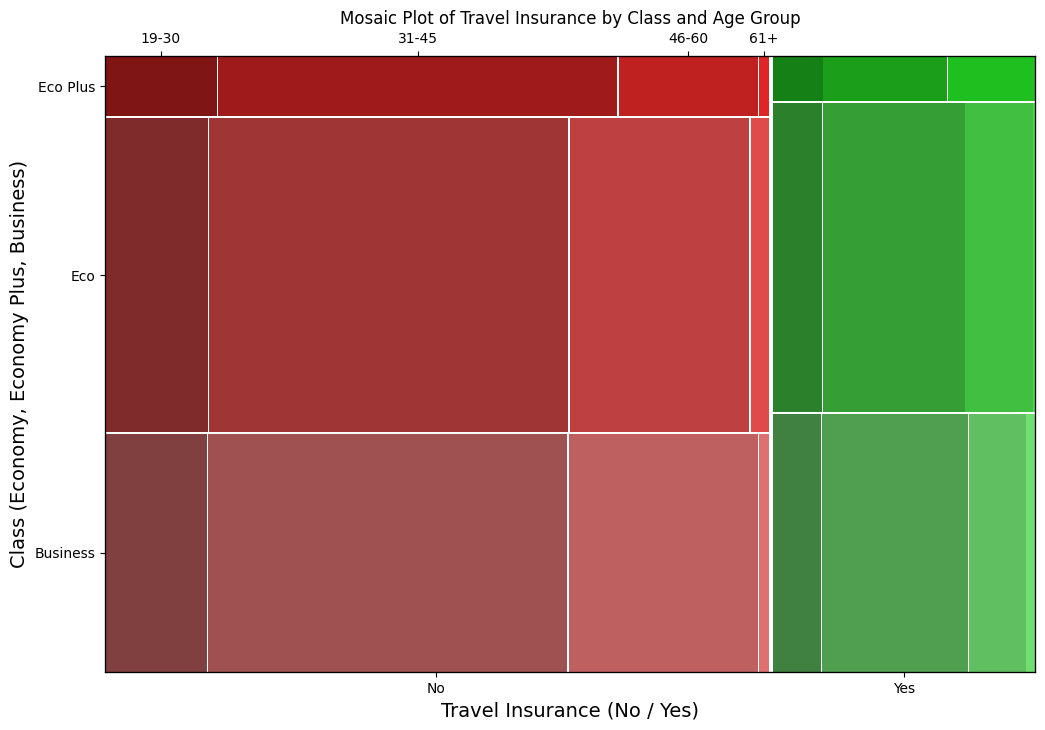

In [64]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
from matplotlib import cm

data = dirty_data

# creating age groups
bins = [18, 30, 45, 60, float('inf')]
labels = ['19-30', '31-45', '46-60', '61+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# selecting necessary columns and create a copy to avoid warnings
plot_data = data[['Travel Insurance Purchased', 'Age Group', 'Class']].copy()

# defining and ordering age groups, then sorting by age group
plot_data['Age Group'] = pd.Categorical(plot_data['Age Group'],
                                        categories=['19-30', '31-45', '46-60', '61+'],
                                        ordered=True)

# sorting data by age groups
plot_data = plot_data.sort_values(by=['Age Group'])

# creating the mosaic plot with our group color palette
fig, ax = plt.subplots(figsize=(12, 8))
mosaic(plot_data,
       ['Travel Insurance Purchased', 'Class', 'Age Group'],
       title='Mosaic Plot of Travel Insurance by Class and Age Group',
       ax=ax,
       properties={'color': cm.RdYlGn(0.5)},  # applying the group palette, which is RdYlGn
       labelizer=lambda key: "")  # removing box labels using labelizer

# customizing axis labels
ax.set_xlabel('Travel Insurance (No / Yes)', fontsize=14)
ax.set_ylabel('Class (Economy, Economy Plus, Business)', fontsize=14)

# showing the plot
plt.show()
